<a href="https://colab.research.google.com/github/tingpeisuen/WMU102-Heart-Attack-Prediction/blob/main/WMU102.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Heart Attack Prediction with Machine Learning**


## **Introduction**
Heart attack, also called a myocardial infarction (MI), happens when a part of the heart muscle doesn’t get enough oxygen through blood. (source: https://www.cdc.gov/heartdisease/heart_attack.htm)

The narrowing of coronary arteries due to the build-up of plaque (a combination of cholesterol, fatty substances, cellular waste products, calcium and blood-clotting material) causes more than 90% of heart attacks. (source: https://www.sunlifemalaysia.com/life-moments/learn-plan/health-for-life/heart-disease-how-to-distinguish-the-signs-and-re/) According to the latest WHO data published in 2018, Coronary Heart Disease Deaths in Malaysia reached 34,766 or 24.69% of total deaths. Heart attack may also caused by coronary artery spasm, which may related to certain drugs (such as cocaine), emotional stress or pain, exposure to extreme cold and cigarette smoking.(source: https://www.worldlifeexpectancy.com/malaysia-coronary-heart-disease)

Data analytics and machine learning allow us to study huge datasets and find hidden trends or information then predict outcomes accordingly. In this project, we have proposed a few heart attack prediction models and compare their accuracy based on factors including age, gender, number of vessels etc.

For this machine learning project, we choose a dataset from the medical domain, heart attack. We build this machine learning model to predict whether a patient has heart attack or not by interpreting the variables given.

Steps:
1. Import Necessary Libraries
2. Read In and Explore the Data
3. Data Analysis
4. Data Cleaning
5. Data Visualization
6. Prepocessing the Data for Modelling
7. Choosing the Best Model
8. Discussion
9. Conclusion






## **1. Import necessary Libraries**
Firstly, we need to import necessary libraries such as pandas, seaborn and numpy.



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Next, we upload the dataset: heart.csv

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


## **2. Read in and Explore the Data**
It is time to read in our training and testing data using pd.read_csv and take a first look at the training data using the describe function, df()

In [ ]:
df=pd.read_csv('heart.csv')

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


**Dataset:** Dataset of heart attack is taken from
https://www.kaggle.com/emrearslan123/eda-prediction-on-heart-attack-dataset/data

Description obtained from the dataset source is unclear. Hence, we need to define the variables.
* Age: Age of the patient
* Sex: Gender of the patient (1 = male, 0 = female)
* cp: Chest Pain type chest pain type
  * Value 0: typical angina
  * Value 1: atypical angina
  * Value 2: non-anginal pain
  * Value 3: asymptomatic
* trestbps: resting blood pressure (in mm Hg)
* chol: cholestoral in mg/dl fetched via BMI sensor
* fbs: (fasting blood sugar > 120 mg/dl) (1 = yes; 0 = no)
* restecg: resting electrocardiographic results
  * Value 0: normal
  * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
  * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
* thalach: maximum heart rate achieved
* exang: exercise induced angina (1 = yes; 0 = no)
* oldpeak: ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
  * Value 0: Upsloping
  * Value 1: Flat
  * Value 2: Downsloping
* ca: number of major vessels ~ (0-3)
* thal: Thalium Stress Test result ~ (0,3)
* target: 0 = less chance of heart attack, 1 = more chance of heart attack**

## **3. Data Analysis**
We are going to consider the features in the dataset and how complete they are.

**Check the columns' data types**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


**Checking the shape/size of dataset**

In [ ]:
df.shape

(303, 14)

**Getting the statistical summary of dataset**

In [ ]:
df.describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


There are a total of 303 patients in our dataset.

This is an **imbalance dataset** since the mean for 'target' is 0.545, which is slightly skewed towards heart attack. However, since the skewness is small, the data set is still effective to be used in machine learning. (source: https://www.researchgate.net/post/What_is_the_exact_data_sample_ratio_of_every_classes_to_declare_a_dataset_suffering_from_a_slight_severe_class_imbalance_problem)

## **4.Data Cleaning**
**Checking for the missing values**

In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**Checking for the duplicates**

In [ ]:
df.duplicated().sum()

1

Handling the duplicates

In [ ]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

The dataset is complete and no cleaning process is necessary.

## **5. Data Visualization**

Graph plotting to have a look on the overall data first.

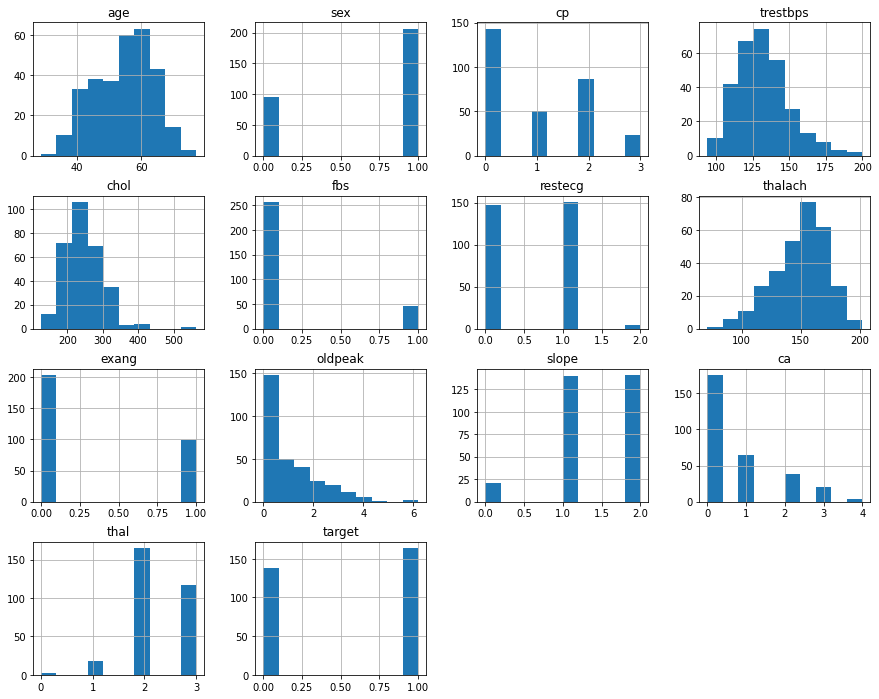

In [ ]:
df.hist(figsize=(15,12))
plt.show();


- Most of the patients have **Age** (50-60). In which maximum number of Patients have age 56.
- Around 207 are **male** patients and 96 are **female** patients.
- Most of the patients have type Value 0 **Chest Pain** that is typical angina value.
- Most of the patients have **Resting Blood Pressure** lies between (130-140).
- Most of the patients have **Chlostrol Level** lies between (200-250).
- Most of the patients have no issue about **fasting blood sugar**.
- Only a few of patients showing **probable or definite left ventricular hypertrophy by Estes' criteria**.
- Most of the patients have **Maximum Heart Rate** lies between (155-165).
- Most of the patients have no issue about **exercise included angina**.
- Most of the patients have **flat** or **downsloping** of the epeak exercise ST segment.
- Most of the patients have **0 major vessels**.
- Most of the patients have level 2 and 3 **Thalium stress test result**.
- Around 163 patients with **heart attack** and 140 patients without **heart attack**.


Note that oldpeak shows a very high amount of zero. Since the relativity should not be zero, we assume the zeros as no result recorded. Since it shows a large amount of zeros, we decide to drop the "oldpeak" column for our machine learning process.

### **Age**

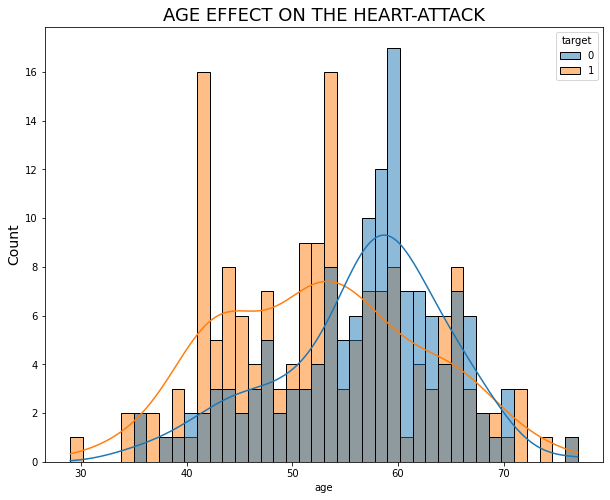

In [ ]:
plt.figure(figsize=(10, 8))
sns.histplot(data=df, x='age', hue='target', bins=40, kde=True);
plt.title("AGE EFFECT ON THE HEART-ATTACK",fontsize=18)
plt.ylabel("Count",fontsize=14)
plt.show();

From the graph above, it shows that there is no strong relationship between age with heart attack.
So we can't say with increasing the age there is high chance of heart attack or low chance of heart attack.

### **Gender/Sex**

<Figure size 1008x288 with 0 Axes>

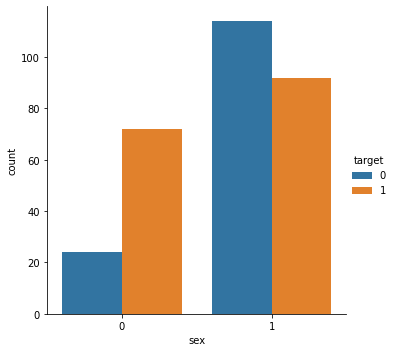

{75.0} {44.66}


In [ ]:
plt.figure(figsize=(14, 4))
sns.catplot(x="sex", data=df, kind="count", hue="target")
plt.show();
print({round(df[df["sex"]==0]["target"].mean()*100,2)},{round(df[df["sex"]==1]["target"].mean()*100,2)})

From the graph above, female has a probability of 75.0 % have a heart disease while male has a probability of 44.66 % have a heart attack.

However, in the sample, there is more male person than female person getting heart attack.

### **Chest Pain Type**

<Figure size 1008x288 with 0 Axes>

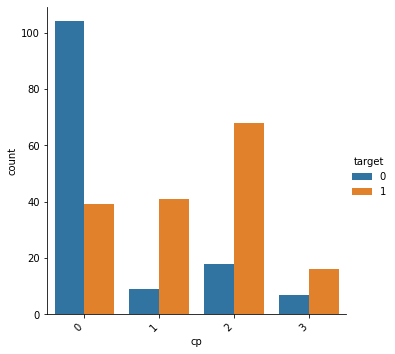

In [ ]:
plt.figure(figsize=(14, 4))
sns.catplot(x="cp", data=df, kind="count", hue="target")
plt.xticks(rotation=45, horizontalalignment='right')
plt.show();

From the graph above, it show that the patients with asymptomatic, non-antiginal pain and atypical angina chest pain have high chance of heart attack.

While the patients with typical angina chest pain have low chance of heart attack. 

### **Resting Blood Pressure**

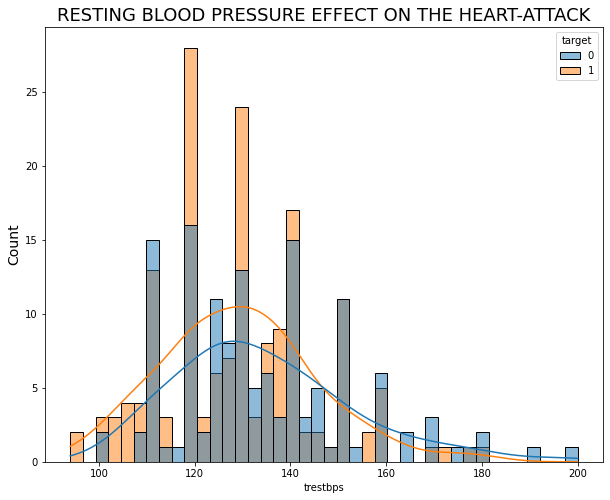

In [ ]:
plt.figure(figsize=(10, 8))
sns.histplot(data=df, x='trestbps', hue='target', bins=40, kde=True);
plt.title("RESTING BLOOD PRESSURE EFFECT ON THE HEART-ATTACK",fontsize=18)
plt.ylabel("Count",fontsize=14)
plt.show();

From the graph above, it shows that there is no strong relationship between the resting blood pressure and heart attack.

### **Cholestrol Effect**

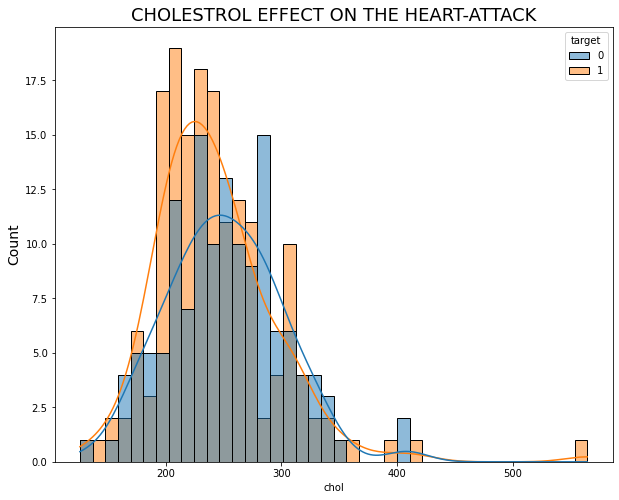

In [ ]:
plt.figure(figsize=(10, 8))
sns.histplot(data=df, x='chol', hue='target', bins=40, kde=True);
plt.title("CHOLESTROL EFFECT ON THE HEART-ATTACK",fontsize=18)
plt.ylabel("Count",fontsize=14)
plt.show();

From the graph above, it shows that there is no strong relationship between cholestrol effect and heart attack.

### **Fasting Blood Sugar**

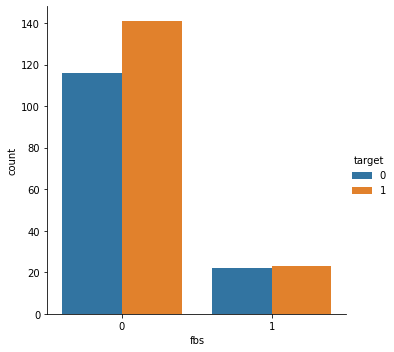

fbs
0    0.548638
1    0.511111
Name: target, dtype: float64


In [ ]:
sns.catplot(x="fbs", data=df, kind="count", hue="target")
plt.show();
print(df.groupby('fbs')['target'].mean().sort_values(ascending=False))

From the graph above, it show that the probability of patients with fasting blood sugar less than 120mg/dl to have heart attack is 0.549, whereas for patients with higher blood sugar when fasting is 0.511.

The difference is very small, hence it shows no strong relationship between fasting blood sugar and heart attack.


### **Resting Electrocardiographic results**

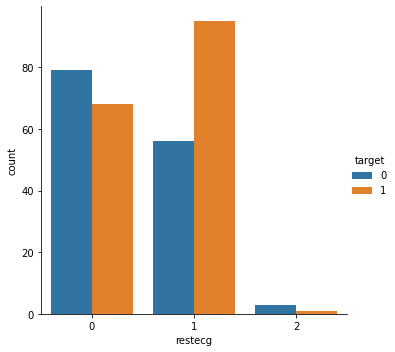

restecg
1    0.629139
0    0.462585
2    0.250000
Name: target, dtype: float64


In [ ]:
sns.catplot(x="restecg", data=df, kind="count", hue="target")
plt.show();
print(df.groupby('restecg')['target'].mean().sort_values(ascending=False))

From the graph above, it shows that person with ST-T wave abnormality is more likely to have a heart attack than the others.

### **Maximum Heart Rate**

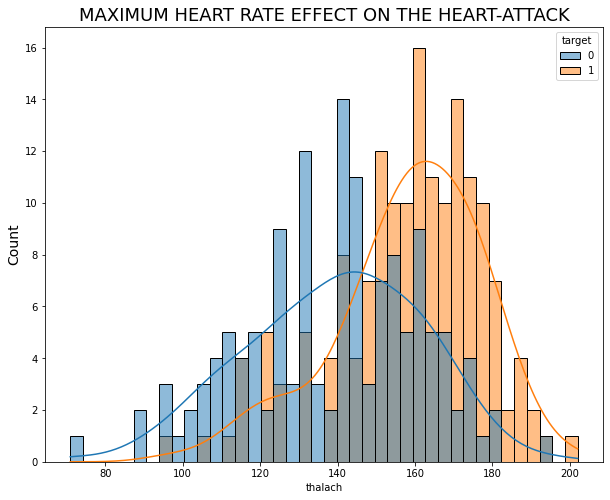

In [ ]:
plt.figure(figsize=(10, 8))
sns.histplot(data=df, x='thalach', hue='target', bins=40, kde=True);
plt.title("MAXIMUM HEART RATE EFFECT ON THE HEART-ATTACK",fontsize=18)
plt.ylabel("Count",fontsize=14)
plt.show();

From the graph above, it shows that a person with higher value of maximum heart rate have higher chance to get heart attack compare to lower value of maximum heart rate.

### **Exercise Angina**

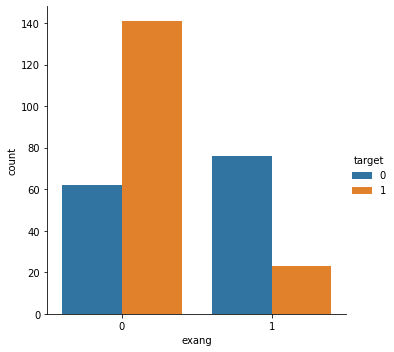

exang
0    0.694581
1    0.232323
Name: target, dtype: float64


In [ ]:
sns.catplot(x="exang", data=df, kind="count", hue="target")
plt.show();
print(df.groupby('exang')['target'].mean().sort_values(ascending=False))

From the graph above, it shows that a person without exercise angina are more easily to get heart attack compare to a person with exercise angina.

### **ST Slope**

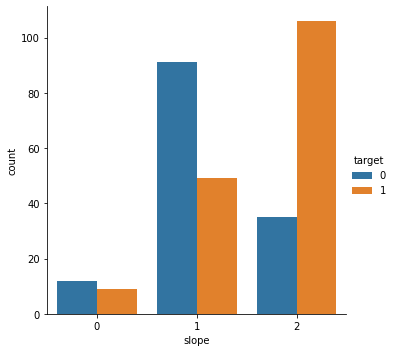

slope
2    0.751773
0    0.428571
1    0.350000
Name: target, dtype: float64


In [ ]:
sns.catplot(x="slope", data=df, kind="count", hue="target")
plt.show();
print (df.groupby('slope')['target'].mean().sort_values(ascending=False))

From the graph above, it shows that downsloping ST-Slope have higher chance to get heart attack compare to others.

### **Thallium Stress Result**

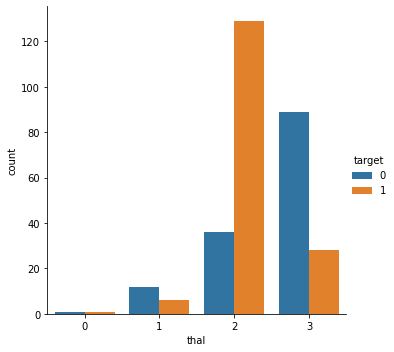

thal
2    0.781818
0    0.500000
1    0.333333
3    0.239316
Name: target, dtype: float64


In [ ]:
sns.catplot(x="thal", data=df, kind="count", hue="target")
plt.show();
print (df.groupby('thal')['target'].mean().sort_values(ascending=False))

From the graph above, it shows that a person with level 2 of Thalium stress test have higher chance to get heart attack compare to others.

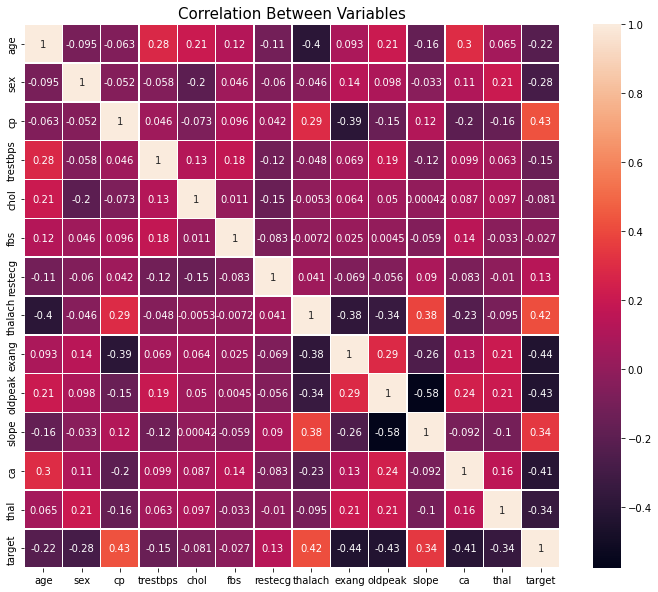

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True, linewidths='.5', color='#57b7a2' )
plt.title("Correlation Between Variables", size=15)
plt.show()

## **6. Preprocessing the Data for Modeling**


Split the data into X and Y datasets

In [ ]:
X = df.drop(['target','oldpeak'],axis=1)
y = df['target']

Train-Test split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Standardizing the data

In [ ]:
from sklearn.preprocessing import StandardScaler

# Perform pre-processing to scale numeric features
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
# Test features are scaled using the scaler computed for the training features
X_test = scale.transform(X_test)

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score, train_test_split

def evaluate(classifier, X_train, y_train, X_test, y_test): 
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    conf = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(conf)
    print("Training set score: {:.3f}".format(classifier.score(X_train, y_train)))
    print("Test set score: {:.3f}".format(classifier.score(X_test, y_test)))

## **7. Machine Learning Models**

### **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

Training set score: 0.842
Test set score: 0.885


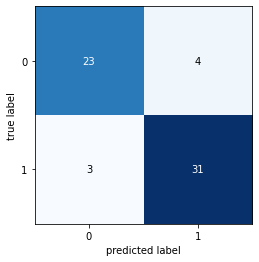

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
pred_LogReg = log_reg.predict(X_test)
score = accuracy_score(y_test, pred_LogReg)

evaluate(log_reg, X_train, y_train, X_test, y_test)

### **GaussianNB**

In [ ]:
from sklearn.naive_bayes import GaussianNB

Training set score: 0.834
Test set score: 0.852


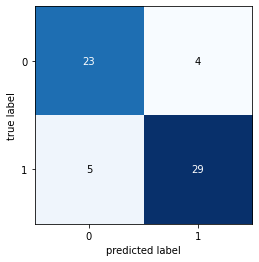

In [ ]:
GNB = GaussianNB()
GNB.fit(X_train, y_train)
pred_GNB = GNB.predict(X_test)
score = accuracy_score(y_test, pred_GNB)

evaluate(GNB, X_train, y_train, X_test, y_test)

### **SVC**

In [ ]:
from sklearn.svm import SVC

Training set score: 0.909
Test set score: 0.918


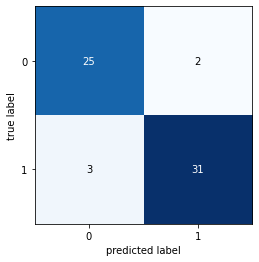

In [ ]:
svm = SVC(random_state=0)
svm.fit(X_train, y_train)
pred_SCV = svm.predict(X_test)
score = accuracy_score(y_test, pred_SCV)

evaluate(svm, X_train, y_train, X_test, y_test)

### **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

Training set score: 0.867
Test set score: 0.820


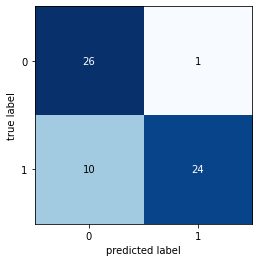

In [ ]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
pred_KNN1 = knn.predict(X_test)
score = accuracy_score(y_test, pred_KNN1)

evaluate(knn, X_train, y_train, X_test, y_test)

Optimizing the KNN Model

In [ ]:
score_list=[]

for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors=i)
    knn2.fit(X_train, y_train)
    pred_KNN2 = knn2.predict(X_test)
    score_list.append(accuracy_score(y_test, pred_KNN2))

Text(0, 0.5, 'Score')

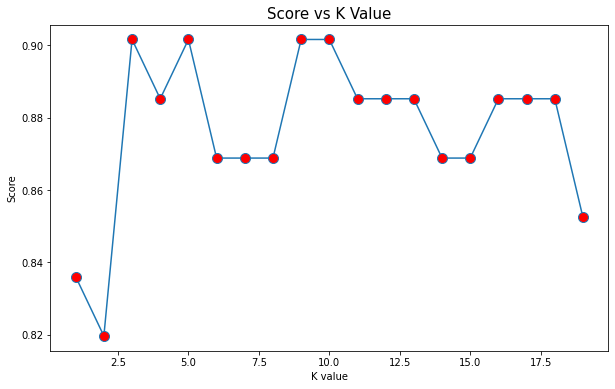

In [ ]:
plt.figure(figsize =(10, 6))
plt.plot(range(1, 20), score_list, marker ='o', markerfacecolor ='red', markersize = 10)
  
plt.title('Score vs K Value', size=15)
plt.xlabel('K value')
plt.ylabel('Score')

The K value that we get the highest accuracy score with is 3, 5, 10..., so we are setting the "n_neighbors" parameter to 3.

Training set score: 0.851
Test set score: 0.902


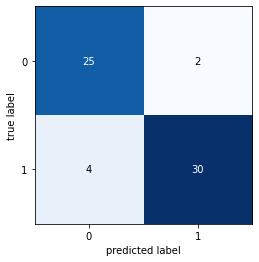

In [ ]:
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train, y_train)
pred_KNN3 = knn3.predict(X_test)
score = accuracy_score(y_test, pred_KNN3)

evaluate(knn3, X_train, y_train, X_test, y_test)

## **8. Discussion**

### **Comparison between Models**

In [ ]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'GaussianNB', 'SVC', 'KNN'],
    'Accuracy': [accuracy_score(y_test, pred_LogReg), accuracy_score(y_test, pred_GNB), accuracy_score(y_test, pred_SCV), accuracy_score(y_test, pred_KNN3)]})
models.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
2,SVC,0.918033
3,KNN,0.901639
0,Logistic Regression,0.885246
1,GaussianNB,0.852459


SCV and KNN show high accuracy which is higher than 0.90. Among the machine learning methods chosen, SVC shows the highest accuracy which is 0.918, and hence it is most suitable to be used in the prediction. It is followed by KNN with 0.902. GaussianNB with accuracy 0.885 and Logistic Regression with accuracy 0.869 is the lower, and less than 0.90, and hence it is less suitable to be used to do the prediction.

**Logistic regression** is a statistical model that in its basic form uses a logistic function to model a binary dependent variable. In practical it can be binomial, ordinal or multinomial, in which it makes use of one or more predictor variables that may be either continuous or categorical. Unlike other linear regression, it is used for predicting dependent variables that take membership in one of a limited number of categories rather than a continuous outcome. (source: https://en.wikipedia.org/wiki/Logistic_regression)

**Gaussian Naive Bayes** is a variant of Naive Bayes that follows Gaussian normal distribution and supports continuous data. When working with continuous data, an assumption often taken is that the continuous values associated with each class are distributed according to a normal (or Gaussian) distribution. Naive Bayes are a group of supervised machine learning classification algorithms based on the Bayes theorem. They find use when the dimensionality of the inputs is high. One assumption taken is the strong independence assumptions between the features. (source: https://iq.opengenus.org/gaussian-naive-bayes/)

**Linear Support Vector Classifier** (SVC) method applies a linear kernel function to perform classification and it performs well with a large number of samples. (source: https://www.datatechnotes.com/2020/07/classification-example-with-linearsvm-in-python.html) It aims to fit the data provided, returns a "best fit" hyperplane that divides, or categorizes, the data. From there, after getting the hyperplane, we can then feed some features to the classifier to see what the "predicted" class is. This makes this specific algorithm rather suitable for the uses, though you can use this for many situations. (source: https://pythonprogramming.net/linear-svc-example-scikit-learn-svm-python/)

**K-nearest neighbors (KNN)** algorithm is a simple, easy-to-implement supervised machine learning algorithm that can be used to solve both classification and regression problems. KNN algorithm assumes that similar things exist in close proximity. It works by finding the distances between a query and all the examples in the data, selecting the specified number examples (K) closest to the query, then votes for the most frequent label (in the case of classification) or averages the labels (in the case of regression). (source: https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761)

### **Limitations**

Due to the constraint of data, the accurancy of the machine learning is low, since there is posibility that the patient have a symptom that is not listed in the data.

### **Impacts**

Machine learning can aid clinicians to correctly identify diseases and increase the quality of treatment. It can also analyze additional data on a patient’s condition, like their previous CT scans, tests, and screenings or their relative’s chronic conditions to help doctors make a correct diagnosis and enable better care. 

### **Deployment**

A website application will be built to **provide a rough but quick result** for its users. There will be inputs for the users to enter their details, in which the machine learning system will produce and give a predicted result for the users. Users will get to know the accuracy of the prediction, take the result seriously and take good care of their health.

Detailed definitions for every variables will be given, including an average value for every regression variables. If the users do not know some of their details, they may enter the average value or make a rough but quick reflection to determine which choices should he/she take.

**SQL database** will be used to store the data. SQL is able to retrieve, insert, update, delete data from a database and other more. It is easy to use since it requires no coding skills, using standardasized and interactive language, and the most important, it has faster query processing.

Users will be encourgead to enter their contact in the website. However, it is unnecessary to be entered. Those enter the contact are volunteered to be **followed up** in the future, in order to be included in the dataset. There will also be one section for **volunteered professionals** to enter their datasets. However, a more detailed personal data included their license in their professionalities will be required to ensure the reliability of the data.

If the model is proved performing as intended, a further effort will directed to create a **health watch**. Combined with the technologies of detecting the health details, the watch will be able to remind the users to have a health living style, and most importantly, warn the users if they have a high chance of getting heart attack.

If the model is failing, more reliable data will be collected for the machine learning to get a more accurate dataset. Some other machine learning models will be tested and the best model will be chosen to continue this project. 

## **9. Conclusion**

Heart disease as the top killer in Malaysia should be taken seriously. With the help of data analytics and machine learning, people are able to predict if the patient will have a heart attack. In this project, we have analyse the data and use four type of machine learning to study it. Their accuracies have been compared, in which SCV gives the highest accuracy (0.918), followed by KNN (0.902), Logistic Regression (0.885) and lastly Gaussian NB (0.852). It can be concluded that SCV is the best model for this prediction.